In [1]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np
from sympl import get_constant

Rd = get_constant('gas_constant_of_dry_air', 'J kg^-1 K^-1')
Cp =\
    get_constant('heat_capacity_of_dry_air_at_constant_pressure',
                 'J kg^-1 K^-1')
g=get_constant('gravitational_acceleration',
                 'm s^-2') 

DSE2T=5.324161022769655e-19

/home/data/miniconda3/lib/python3.8/site-packages/sympl/_core/dataarray.py:6: FutureWarning: xarray subclass DataArray should explicitly define __slots__
  class DataArray(xr.DataArray):


In [2]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)

with gzip.open('/home/scratch/Abel_data/heat_residuev4', 'rb') as f:
    res=pickle.load(f)

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
int4=[]
int5=[]
int6=[]

a0=[];a1=[];a2=[];a3=[];a4=[];a5=[]

mx=[]
for i in range(len(Rey[0])):
    
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
    
        R0=Rey[0][i][:,:7].sum(axis=1)
        R1=Rey[1][i][:,:7].sum(axis=1)
        R2=Rey[2][i][:,:7].sum(axis=1)
        R3=Rey[3][i][:,:7].sum(axis=1)

        a0.append(np.mean(R0))
        a1.append(np.mean(R1))
        a2.append(np.mean(R2))
        a3.append(np.mean(R3))
        a4.append(np.mean(convfv[i][:,:7].sum(axis=1)))
        a5.append(np.mean(res[i]))

        st=heat_index[i][-2];end=heat_index[i][-1]

        tot=R0+R1+R2+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int0.append(np.mean(np.cumsum(np.insert(tot,0,0))))

        t=R0+R1+np.mean(R2)+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int1.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R0+R2+np.mean(R1)+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int2.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=np.mean(R0)+R3+R1+R2+convfv[i][:,:7].sum(axis=1)+res[i]
        int3.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R0+R1+R2+np.mean(R3)+convfv[i][:,:7].sum(axis=1)+res[i]
        int4.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R0+R1+R2+R3+np.mean((convfv[i][:,:7]).sum(axis=1))+res[i]
        int5.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R0+R1+R2+R3+convfv[i][:,:7].sum(axis=1)+np.mean(res[i])
        int6.append(np.mean(np.cumsum(np.insert(t,0,0))))

print(np.mean(a0),np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5))

1.4328011202913962 4.4057560048439885
4.450132069572772e+18 1.936840439614903e+17 3.233835901184357e+17 -3.582349194966887e+18 -1.9006358318638096e+17 -1.298390243573887e+18


<IPython.core.display.Javascript object>


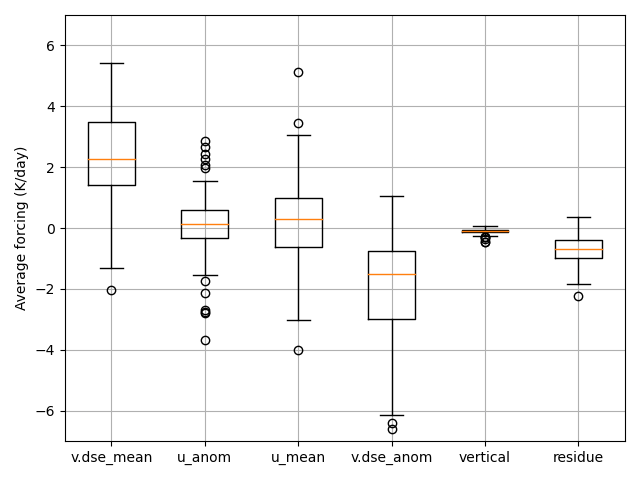

In [3]:
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

plt.boxplot([np.array(a0)*DSE2T, np.array(a1)*DSE2T, np.array(a2)*DSE2T, np.array(a3)*DSE2T, np.array(a4)*DSE2T,
             np.array(a5)*DSE2T])
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
plt.ylim([-7,7])

# print(np.mean(int0))
# print(np.mean(int1))
# print(np.mean(int2))
# print(np.mean(int3))
# print(np.mean(int4))
# print(np.mean(int5))
# print(np.mean(int6))

plt.xticks([1, 2, 3, 4, 5, 6], ['v.dse_mean', 'u_anom', 'u_mean', 'v.dse_anom', 'vertical', 'residue'])
plt.grid()
plt.ylabel('Average forcing (K/day)')
plt.tight_layout()

# plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_mean90_poleward.png', bbox_inches='tight',dpi=300)

<IPython.core.display.Javascript object>


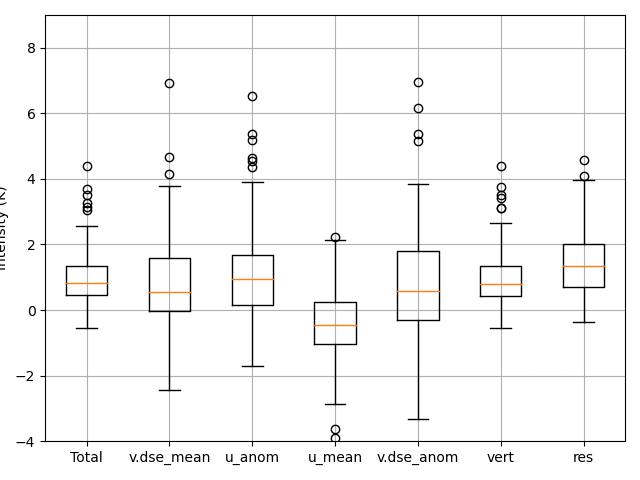

0.9619788512352808
-0.4499802399493376
1.0957906963753816
0.7815919182164672
0.8399251603654582
0.9536813584762089
1.4404497990578582


Text(44.222222222222214, 0.5, 'Intensity (K)')

In [4]:
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

plt.boxplot([np.array(int0)*DSE2T, np.array(int3)*DSE2T, np.array(int2)*DSE2T, np.array(int1)*DSE2T, np.array(int4)*DSE2T,
             np.array(int5)*DSE2T, np.array(int6)*DSE2T])
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
plt.ylim([-4,9])

print(np.mean(int0)*5.324161022769655e-19)
print(np.mean(int1)*5.324161022769655e-19)
print(np.mean(int2)*5.324161022769655e-19)
print(np.mean(int3)*5.324161022769655e-19)
print(np.mean(int4)*5.324161022769655e-19)
print(np.mean(int5)*5.324161022769655e-19)
print(np.mean(int6)*5.324161022769655e-19)

plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Total', 'v.dse_mean', 'u_anom', 'u_mean',  'v.dse_anom', 'vert', 'res'])
plt.grid()
plt.tight_layout()
plt.ylabel('Intensity (K)')

# plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_int90_poleward.png', bbox_inches='tight',dpi=300)

<IPython.core.display.Javascript object>


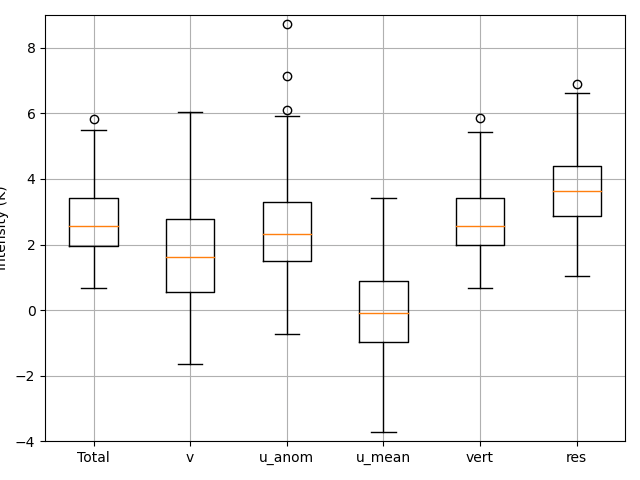

2.7458257197305596
-0.01649663446004248
2.501844491958505
1.6968149896201596
2.1548608944348118
2.7551271003108457
3.7381648933796376


In [114]:
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

plt.boxplot([np.array(int0)*DSE2T, np.array(int3)*DSE2T, np.array(int2)*DSE2T, np.array(int1)*DSE2T,
             np.array(int5)*DSE2T, np.array(int6)*DSE2T])
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
plt.ylim([-4,9])

print(np.mean(int0)*5.324161022769655e-19)
print(np.mean(int1)*5.324161022769655e-19)
print(np.mean(int2)*5.324161022769655e-19)
print(np.mean(int3)*5.324161022769655e-19)
print(np.mean(int4)*5.324161022769655e-19)
print(np.mean(int5)*5.324161022769655e-19)
print(np.mean(int6)*5.324161022769655e-19)

plt.xticks([1, 2, 3, 4, 5, 6], ['Total', 'v', 'u_anom', 'u_mean', 'vert', 'res'])
plt.grid()
plt.tight_layout()
plt.ylabel('Intensity (K)')

plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_int90_poleward2.png', bbox_inches='tight',dpi=300)

In [2]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev4', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

heat0=np.zeros(15)
heat1=np.zeros(15)
heat2=np.zeros(15)
res_arr=np.zeros(15)
res_arr2=np.zeros(15)
act=np.zeros(15)
act2=np.zeros(15)

heat20=np.zeros(15)
heat21=np.zeros(15)
heat22=np.zeros(15)

c=0
for i in range(len(Rey[0])):
    
#     if (dur_list[i]>=3  and dur_list[i]<=5):
        
        c=c+1
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]

        t=Rey[1][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]


print(c)

1.4328011202913962 4.4057560048439885
1347


<IPython.core.display.Javascript object>


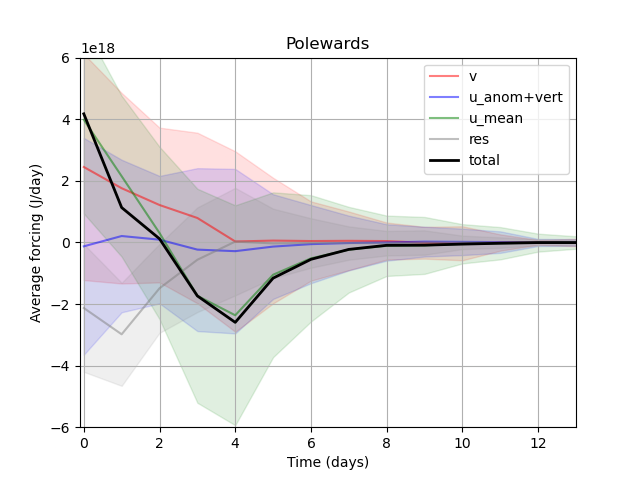

5.7431667739966996e+20 -4.6570775966930354e+19 2.1729667774887944e+19
-1.1270689787007846e+18


In [3]:
plt.plot(heat0/c, label='v', color='red', alpha=0.5)
std=np.sqrt((heat20-(heat0*heat0)/c)/(c-1))
plt.fill_between(range(len(heat0)), heat0/c-std,heat0/c+std, alpha=0.12,color='red')

plt.plot(heat1/c, label='u_anom+vert', color='blue', alpha=0.5)
std=np.sqrt((heat21-(heat1*heat1)/c)/(c-1))
plt.fill_between(range(len(heat1)), heat1/c-std,heat1/c+std, alpha=0.12,color='blue')

plt.plot(heat2/c, label='u_mean', color='green', alpha=0.5)
std=np.sqrt((heat22-(heat2*heat2)/c)/(c-1))
plt.fill_between(range(len(heat2)), heat2/c-std,heat2/c+std, alpha=0.12,color='green')

plt.plot(res_arr/c, label='res', color='grey', alpha=0.5)
std=np.sqrt((res_arr2-(res_arr*res_arr)/c)/(c-1))
plt.fill_between(range(len(res_arr)), res_arr/c-std,res_arr/c+std, alpha=0.12,color='grey')

plt.plot((heat0+heat1+heat2+res_arr)/c, linewidth=2, color='black', label='total')
# plt.plot((act)/c, linewidth=2, color='black', label='total')

# plt.plot(act/c, label='res', color='grey', alpha=0.5)
# std=np.sqrt((act2-(act*act)/c)/(c-1))
# plt.fill_between(range(len(act)), act/c-std,act/c+std, alpha=0.12,color='grey')

print(np.mean(heat0), np.mean(heat1), np.mean(heat2))
th=(heat0+heat1+heat2+res_arr)/c
print(np.sum(th))

plt.xlim([-0.1,13])
plt.legend()
plt.ylim(-6e18, 6e18)
plt.title('Polewards')
plt.ylabel('Average forcing (J/day)')
plt.xlabel('Time (days)')
plt.grid()
plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_dur_poleward.png', bbox_inches='tight',dpi=300)

In [54]:
std=np.sqrt((act2-(act*act)/c)/(c-1))
mean=act/c

# print(th[:3].sum()/(th[3:6].mean()))

print(mean[3:]/mean[3:].sum())
print(-std[3:]/mean[3:].sum())

[ 0.26527938  0.39632471  0.17717311  0.08388002  0.03466635  0.01441519
  0.01360081  0.00847655  0.00423892  0.00097655  0.0009684  -0.        ]
[0.49732479 0.57629051 0.44547761 0.29899273 0.20299494 0.14341073
 0.12298752 0.10172403 0.06161669 0.02198549 0.02082429 0.        ]


<IPython.core.display.Javascript object>


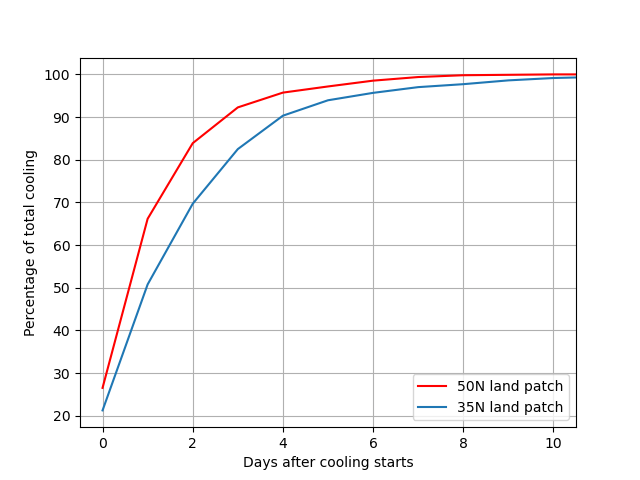

In [55]:
%matplotlib notebook
xp=[0.26527938, 0.66160409, 0.8387772,  0.92265722, 0.95732358, 0.97173877,
     0.98533958, 0.99381613, 0.99805505, 0.9990316,  1.,         1.        ]

xe=[0.21249905, 0.50775844, 0.69684801, 0.82492792, 0.90323723, 0.93936555,
     0.95673226, 0.97015968, 0.97709125, 0.98599529, 0.99152977, 0.99410091,
     0.99562012, 0.99722353, 0.99852439, 0.99926809, 1.        ]

plt.plot(np.array(xp)*100, label='50N land patch', color='red')
plt.plot(np.array(xe)*100, label='35N land patch')
plt.xlim([-0.5,10.5])
plt.xlabel('Days after cooling starts')
plt.ylabel('Percentage of total cooling')
plt.legend()
plt.grid()

plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_cooling.png', bbox_inches='tight',dpi=300)

In [3]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev4', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

heat0=np.zeros(15)
heat1=np.zeros(15)
heat2=np.zeros(15)
res_arr=np.zeros(15)
res_arr2=np.zeros(15)
act=np.zeros(15)
act2=np.zeros(15)

heat20=np.zeros(15)
heat21=np.zeros(15)
heat22=np.zeros(15)

c0=np.zeros(15)
c1=np.zeros(15)
c2=np.zeros(15)
c3=np.zeros(15)
c4=np.zeros(15)

for i in range(len(Rey[0])):
    
#     if (dur_list[i]>=3  and dur_list[i]<=5):
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]
            c0[j]+=1

        t=Rey[1][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]
            c1[j]+=1

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            c2[j]+=1
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            c3[j]+=1
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]
            c4[j]+=1


# print(c)

1.4328011202913962 4.4057560048439885


/tmp/ipykernel_968705/1609289514.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat0/c0, label='v', color='red', alpha=0.5)


<IPython.core.display.Javascript object>


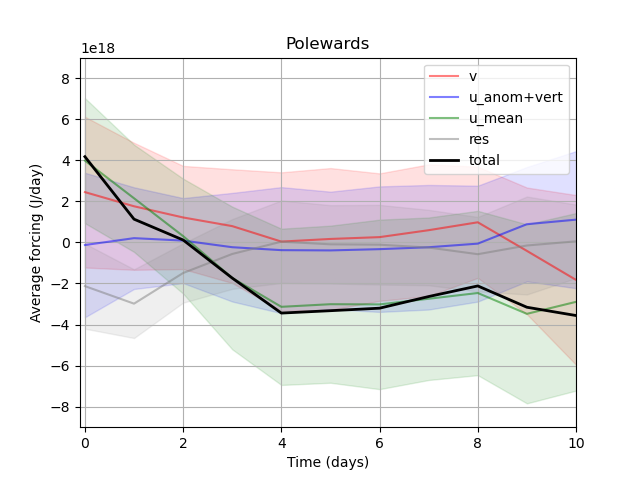

/tmp/ipykernel_968705/1609289514.py:2: RuntimeWarning: invalid value encountered in true_divide
  std=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
/tmp/ipykernel_968705/1609289514.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(range(len(heat0)), heat0/c0-std,heat0/c0+std, alpha=0.12,color='red')
/tmp/ipykernel_968705/1609289514.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat1/c1, label='u_anom+vert', color='blue', alpha=0.5)
/tmp/ipykernel_968705/1609289514.py:6: RuntimeWarning: invalid value encountered in true_divide
  std=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
/tmp/ipykernel_968705/1609289514.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(range(len(heat1)), heat1/c1-std,heat1/c1+std, alpha=0.12,color='blue')
/tmp/ipykernel_968705/1609289514.py:9: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat2/c2, label='u_mean', color='green', alpha=0.5)
/tmp/ipykernel_9687

In [4]:
plt.plot(heat0/c0, label='v', color='red', alpha=0.5)
std=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
plt.fill_between(range(len(heat0)), heat0/c0-std,heat0/c0+std, alpha=0.12,color='red')

plt.plot(heat1/c1, label='u_anom+vert', color='blue', alpha=0.5)
std=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
plt.fill_between(range(len(heat1)), heat1/c1-std,heat1/c1+std, alpha=0.12,color='blue')

plt.plot(heat2/c2, label='u_mean', color='green', alpha=0.5)
std=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
plt.fill_between(range(len(heat2)), heat2/c2-std,heat2/c2+std, alpha=0.12,color='green')

plt.plot(res_arr/c3, label='res', color='grey', alpha=0.5)
std=np.sqrt((res_arr2-(res_arr*res_arr)/c3)/(c3-1))
plt.fill_between(range(len(res_arr)), res_arr/c3-std,res_arr/c3+std, alpha=0.12,color='grey')

plt.plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3, linewidth=2, color='black', label='total')
# plt.plot((act)/c, linewidth=2, color='black', label='total')

# plt.plot(act/c4, label='res', color='grey', alpha=0.5)
# std=np.sqrt((act2-(act*act)/c)/(c-1))
# plt.fill_between(range(len(act)), act/c-std,act/c+std, alpha=0.12,color='grey')

# print(np.mean(heat0), np.mean(heat1), np.mean(heat2))
# th=(heat0+heat1+heat2+res_arr)/c
# print(np.sum(th))

plt.xlim([-0.1,10])

plt.legend()
plt.ylim(-9e18, 9e18)
plt.title('Polewards')
plt.ylabel('Average forcing (J/day)')
plt.xlabel('Time (days)')
plt.grid()
plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_dur_poleward2.png', bbox_inches='tight',dpi=300)

In [5]:
x=(heat0/c0+heat1/c1+heat2/c2+res_arr/c3)[:-1]
print(len(x[:3])-x[:3].sum()/x[3:].mean())
print(c0)

4.894006000630286
[1347. 1347. 1347. 1347. 1016.  470.  231.  116.   60.   38.   21.   10.
    5.    3.    0.]


/tmp/ipykernel_968705/696426816.py:1: RuntimeWarning: invalid value encountered in true_divide
  x=(heat0/c0+heat1/c1+heat2/c2+res_arr/c3)[:-1]


## Threshold specific

In [2]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev4', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
print(cut)

heat0=np.zeros(15)
heat1=np.zeros(15)
heat2=np.zeros(15)
res_arr=np.zeros(15)
res_arr2=np.zeros(15)
vert_arr=np.zeros(15)
vert_arr2=np.zeros(15)
act=np.zeros(15)
act2=np.zeros(15)

heat20=np.zeros(15)
heat21=np.zeros(15)
heat22=np.zeros(15)

c0=np.zeros(15)
c1=np.zeros(15)
c2=np.zeros(15)
c3=np.zeros(15)
c4=np.zeros(15)
# cv=np.zeros(15)
dur_sel=[]

for i in range(len(Rey[0])):
    
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        
        dur_sel.append(dur_list[i])
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]
            c0[j]+=1

        t=Rey[1][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]
            c1[j]+=1

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            c2[j]+=1
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            c3[j]+=1
            
        t=convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            vert_arr[j]+=t[j]
            vert_arr2[j]+=t[j]*t[j]
#             cv[j]+=1
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]
            c4[j]+=1

print(np.mean(dur_sel))
# print(c)

1.4328011202913962 4.4057560048439885
[ 3.00058858  3.16915082  3.84067066  4.10967979  6.15602779 13.47954251]
7.834274323196287


/tmp/ipykernel_3401829/2770873461.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)


<IPython.core.display.Javascript object>


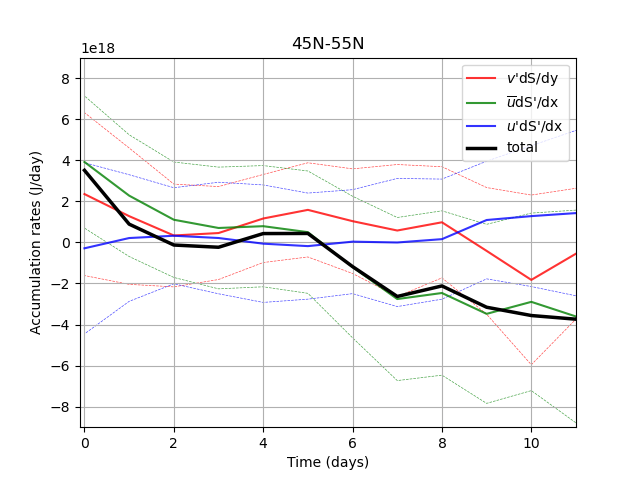

/tmp/ipykernel_3401829/2770873461.py:2: RuntimeWarning: invalid value encountered in true_divide
  std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
/tmp/ipykernel_3401829/2770873461.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')
/tmp/ipykernel_3401829/2770873461.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
/tmp/ipykernel_3401829/2770873461.py:6: RuntimeWarning: invalid value encountered in true_divide
  std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
/tmp/ipykernel_3401829/2770873461.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(range(len(heat2)), heat2/c2-std2,heat2/c2+std2, alpha=0.7,edgecolor='green', facecolor='none', linewidth=0.5, linestyle='--')
/tmp/ipykernel_3401829/2770873461.py:9: Runtim

In [3]:
plt.plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)
std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
plt.fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')

plt.plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
plt.fill_between(range(len(heat2)), heat2/c2-std2,heat2/c2+std2, alpha=0.7,edgecolor='green', facecolor='none', linewidth=0.5, linestyle='--')

plt.plot(heat1/c1, label= r'$u$'+'\''+'dS\'/dx', color='blue', alpha=0.8)
std3=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
plt.fill_between(range(len(heat1)), heat1/c1-std3,heat1/c1+std3, alpha=0.7,edgecolor='blue', facecolor='none', linewidth=0.5, linestyle='--')

# plt.plot(vert_arr/c3, label='vert', color='purple', alpha=0.5)
# std=np.sqrt((vert_arr2-(vert_arr*vert_arr)/c3)/(c3-1))
# plt.fill_between(range(len(vert_arr)), vert_arr/c3-std,vert_arr/c3+std, alpha=0.12,color='purple')

# plt.plot(res_arr/c3, label='res', color='grey', alpha=0.5)
# std=np.sqrt((res_arr2-(res_arr*res_arr)/c3)/(c3-1))
# plt.fill_between(range(len(res_arr)), res_arr/c3-std,res_arr/c3+std, alpha=0.12,color='grey')

plt.plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black', label='total')
# plt.plot((act)/c, linewidth=2, color='black', label='total')

# plt.plot(act/c4, label='res', color='grey', alpha=0.5)
# std=np.sqrt((act2-(act*act)/c)/(c-1))
# plt.fill_between(range(len(act)), act/c-std,act/c+std, alpha=0.12,color='grey')

# print(np.mean(heat0), np.mean(heat1), np.mean(heat2))
# th=(heat0+heat1+heat2+res_arr)/c
# print(np.sum(th))

plt.xlim([-0.1,11])

plt.legend()
plt.ylim(-9e18, 9e18)
plt.title('45N-55N')
plt.ylabel('Accumulation rates (J/day)')
plt.xlabel('Time (days)')
plt.grid()
plt.savefig('/home/data/lab_abel/Paper1_plots/fig10_dur_poleward90.pdf', bbox_inches='tight')

In [5]:
x=(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3)[:-1]
print(x[:6])
print(len(x[:6])-x[:6].sum()/x[6:].mean())
print(-x[:6].sum(),x[6:].mean())
print(-x[:6].sum(),np.cumsum(x[6:]))
print(c0)

[ 3.51039828e+18  8.89217173e+17 -1.28050178e+17 -2.36329534e+17
  4.30308128e+17  4.35725929e+17]
7.870506249650095
-4.901269794657275e+18 -2.6202905205872087e+18
-4.901269794657275e+18 [-1.17850573e+18 -3.81159967e+18 -5.93140603e+18 -9.08937815e+18
 -1.26508268e+19 -1.63909204e+19 -1.81141843e+19 -2.09623242e+19]
[135. 135. 135. 135. 135. 135. 135. 115.  60.  38.  21.  10.   5.   3.
   0.]


/tmp/ipykernel_1870975/3488174000.py:1: RuntimeWarning: invalid value encountered in true_divide
  x=(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3)[:-1]


In [4]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev4', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
print(cut)

heat0=np.zeros(15)
heat1=np.zeros(15)
heat2=np.zeros(15)
res_arr=np.zeros(15)
res_arr2=np.zeros(15)
vert_arr=np.zeros(15)
vert_arr2=np.zeros(15)
act=np.zeros(15)
act2=np.zeros(15)

heat20=np.zeros(15)
heat21=np.zeros(15)
heat22=np.zeros(15)

c0=np.zeros(15)
c1=np.zeros(15)
c2=np.zeros(15)
c3=np.zeros(15)
c4=np.zeros(15)
dur_sel=[]

for i in range(len(Rey[0])):
    
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        
        dur_sel.append(dur_list[i])
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]
            c0[j]+=1

        t=Rey[1][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]
            c1[j]+=1

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            c2[j]+=1
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            c3[j]+=1
            
        t=convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            vert_arr[j]+=t[j]
            vert_arr2[j]+=t[j]*t[j]
#             cv[j]+=1
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]
            c4[j]+=1


print(np.mean(dur_sel))
# print(c)

1.4328011202913962 4.4057560048439885
[ 3.00058858  3.16915082  3.84067066  4.10967979  6.15602779 13.47954251]
3.0781605191731916


/tmp/ipykernel_3401829/3320889114.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)


<IPython.core.display.Javascript object>


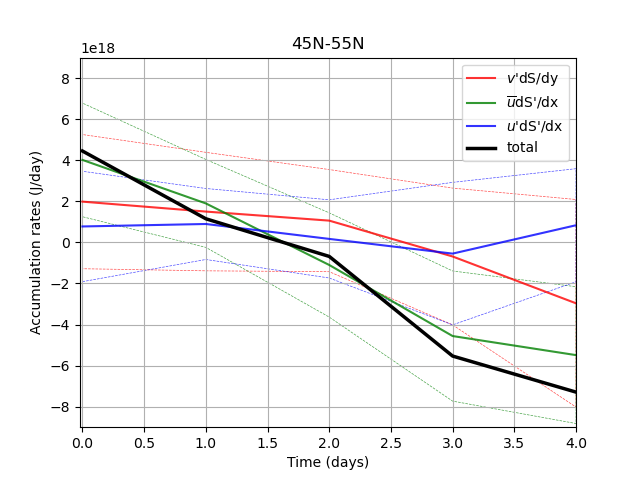

/tmp/ipykernel_3401829/3320889114.py:2: RuntimeWarning: invalid value encountered in true_divide
  std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
/tmp/ipykernel_3401829/3320889114.py:3: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')
/tmp/ipykernel_3401829/3320889114.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
/tmp/ipykernel_3401829/3320889114.py:6: RuntimeWarning: invalid value encountered in true_divide
  std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
/tmp/ipykernel_3401829/3320889114.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(range(len(heat2)), heat2/c2-std2,heat2/c2+std2, alpha=0.7,edgecolor='green', facecolor='none', linewidth=0.5, linestyle='--')
/tmp/ipykernel_3401829/3320889114.py:9: Runtim

In [5]:
plt.plot(heat0/c0, label= r'$v$'+'\''+'dS/dy', color='red', alpha=0.8)
std1=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
plt.fill_between(range(len(heat0)), heat0/c0-std1,heat0/c0+std1, alpha=0.7,edgecolor='red', facecolor='none', linewidth=0.5, linestyle='--')

plt.plot(heat2/c2, label= r'$\overline{u}$'+'dS\'/dx', color='green', alpha=0.8)
std2=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
plt.fill_between(range(len(heat2)), heat2/c2-std2,heat2/c2+std2, alpha=0.7,edgecolor='green', facecolor='none', linewidth=0.5, linestyle='--')

plt.plot(heat1/c1, label= r'$u$'+'\''+'dS\'/dx', color='blue', alpha=0.8)
std3=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
plt.fill_between(range(len(heat1)), heat1/c1-std3,heat1/c1+std3, alpha=0.7,edgecolor='blue', facecolor='none', linewidth=0.5, linestyle='--')

# plt.plot(vert_arr/c3, label='vert', color='purple', alpha=0.5)
# std=np.sqrt((vert_arr2-(vert_arr*vert_arr)/c3)/(c3-1))
# plt.fill_between(range(len(vert_arr)), vert_arr/c3-std,vert_arr/c3+std, alpha=0.12,color='purple')

# plt.plot(res_arr/c3, label='res', color='grey', alpha=0.5)
# std=np.sqrt((res_arr2-(res_arr*res_arr)/c3)/(c3-1))
# plt.fill_between(range(len(res_arr)), res_arr/c3-std,res_arr/c3+std, alpha=0.12,color='grey')

plt.plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3, linewidth=2.5, color='black', label='total')
# plt.plot((act)/c, linewidth=2, color='black', label='total')

# plt.plot(act/c4, label='res', color='grey', alpha=0.5)
# std=np.sqrt((act2-(act*act)/c)/(c-1))
# plt.fill_between(range(len(act)), act/c-std,act/c+std, alpha=0.12,color='grey')

# print(np.mean(heat0), np.mean(heat1), np.mean(heat2))
# th=(heat0+heat1+heat2+res_arr)/c
# print(np.sum(th))

plt.xlim([-0.02,4])

plt.legend()
plt.ylim(-9e18, 9e18)
plt.title('45N-55N')
plt.ylabel('Accumulation rates (J/day)')
plt.xlabel('Time (days)')
plt.grid()
plt.savefig('/home/data/lab_abel/Paper1_plots/fig10_dur_poleward10.pdf', bbox_inches='tight')

In [8]:
x=(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3)[:-10]
print(x[:2])
print(len(x[:2])-x[:2].sum()/x[2:].mean())
print(-x[:2].sum(),np.cumsum(x[2:]))
# print(c0)

[4.44985914e+18 1.15050934e+18]
3.243711952727886
-5.600368484044904e+18 [-6.82827218e+17 -6.21792940e+18 -1.35088397e+19]


/tmp/ipykernel_1870975/4265558573.py:1: RuntimeWarning: invalid value encountered in true_divide
  x=(heat0/c0+heat1/c1+heat2/c2+res_arr/c3+vert_arr/c3)[:-10]


## intensity variation

In [6]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)

with gzip.open('/home/scratch/Abel_data/heat_residuev4', 'rb') as f:
    res=pickle.load(f)

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
int4=[]
int5=[]
int6=[]

a0=[];a1=[];a2=[];a3=[];a4=[];a5=[]

mx=[]
for i in range(len(Rey[0])):
    
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
    
        R0=Rey[0][i][:,:7].sum(axis=1)
        R1=Rey[1][i][:,:7].sum(axis=1)
        R2=Rey[2][i][:,:7].sum(axis=1)
        R3=Rey[3][i][:,:7].sum(axis=1)

        a0.append(np.mean(R0))
        a1.append(np.mean(R1))
        a2.append(np.mean(R2))
        a3.append(np.mean(R3))
        a4.append(np.mean(convfv[i][:,:7].sum(axis=1)))
        a5.append(np.mean(res[i]))

        st=heat_index[i][-2];end=heat_index[i][-1]

        tot=R0+R1+R2+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int0.append(np.mean(np.cumsum(np.insert(tot,0,0))))

        t=R0+R3
        int1.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R1
        int2.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R2
        int3.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R3
        int4.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=convfv[i][:,:7].sum(axis=1)
        int5.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=res[i]
        int6.append(np.mean(np.cumsum(np.insert(t,0,0))))

print(np.mean(a0),np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5))

1.4328011202913962 4.4057560048439885
5.169867396688583e+18 -3.735634142080504e+17 4.690507285602486e+16 -3.2666018856189804e+18 -2.6915040117435328e+17 -1.544558081861681e+18


<IPython.core.display.Javascript object>


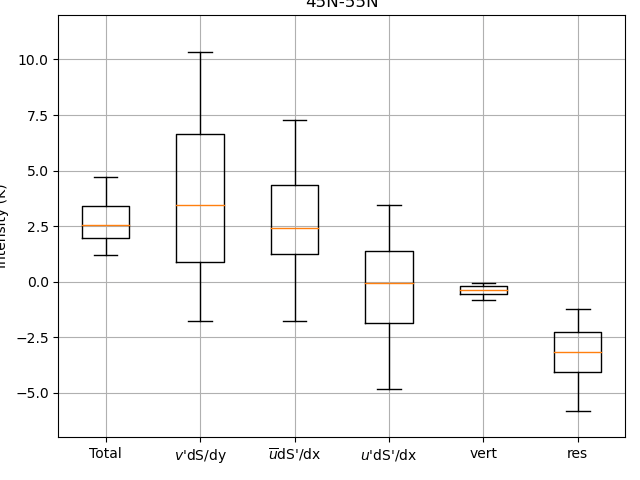

2.7458257197305596
3.8718546519007746
-0.29549817923321275
2.8451893356023903
-4.179113830572951
-0.3990606707809912
-3.2766594177584007


In [7]:
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

plt.boxplot([np.array(int0)*DSE2T, np.array(int1)*DSE2T, np.array(int3)*DSE2T, np.array(int2)*DSE2T,
             np.array(int5)*DSE2T, np.array(int6)*DSE2T], showfliers=False, whis=(5,95))
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
plt.ylim([-7,12])

print(np.mean(int0)*5.324161022769655e-19)
print(np.mean(int1)*5.324161022769655e-19)
print(np.mean(int2)*5.324161022769655e-19)
print(np.mean(int3)*5.324161022769655e-19)
print(np.mean(int4)*5.324161022769655e-19)
print(np.mean(int5)*5.324161022769655e-19)
print(np.mean(int6)*5.324161022769655e-19)

# plt.rcParams['text.usetex'] = True
plt.xticks([1, 2, 3, 4, 5, 6], ['Total', r'$v$'+'\''+'dS/dy', 
                                r'$\overline{u}$'+'dS\'/dx', r'$u$'+'\''+'dS\'/dx',  'vert', 'res'])
plt.grid()
plt.tight_layout()
plt.ylabel('Intensity (K)')
plt.title('45N-55N')

plt.savefig('/home/data/lab_abel/Paper1_plots/fig10_int90_poleward2.pdf', bbox_inches='tight')

In [8]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)

with gzip.open('/home/scratch/Abel_data/heat_residuev4', 'rb') as f:
    res=pickle.load(f)

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])

int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
int4=[]
int5=[]
int6=[]

a0=[];a1=[];a2=[];a3=[];a4=[];a5=[]

mx=[]
for i in range(len(Rey[0])):
    
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
    
        R0=Rey[0][i][:,:7].sum(axis=1)
        R1=Rey[1][i][:,:7].sum(axis=1)
        R2=Rey[2][i][:,:7].sum(axis=1)
        R3=Rey[3][i][:,:7].sum(axis=1)

        a0.append(np.mean(R0))
        a1.append(np.mean(R1))
        a2.append(np.mean(R2))
        a3.append(np.mean(R3))
        a4.append(np.mean(convfv[i][:,:7].sum(axis=1)))
        a5.append(np.mean(res[i]))

        st=heat_index[i][-2];end=heat_index[i][-1]

        tot=R0+R1+R2+R3+convfv[i][:,:7].sum(axis=1)+res[i]
        int0.append(np.mean(np.cumsum(np.insert(tot,0,0))))

        t=R0+R3
        int1.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R1
        int2.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R2
        int3.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=R3
        int4.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=convfv[i][:,:7].sum(axis=1)
        int5.append(np.mean(np.cumsum(np.insert(t,0,0))))

        t=res[i]
        int6.append(np.mean(np.cumsum(np.insert(t,0,0))))

print(np.mean(a0),np.mean(a1),np.mean(a2),np.mean(a3),np.mean(a4),np.mean(a5))

1.4328011202913962 4.4057560048439885
4.450132069572772e+18 1.936840439614903e+17 3.233835901184357e+17 -3.582349194966887e+18 -1.9006358318638096e+17 -1.298390243573887e+18


<IPython.core.display.Javascript object>


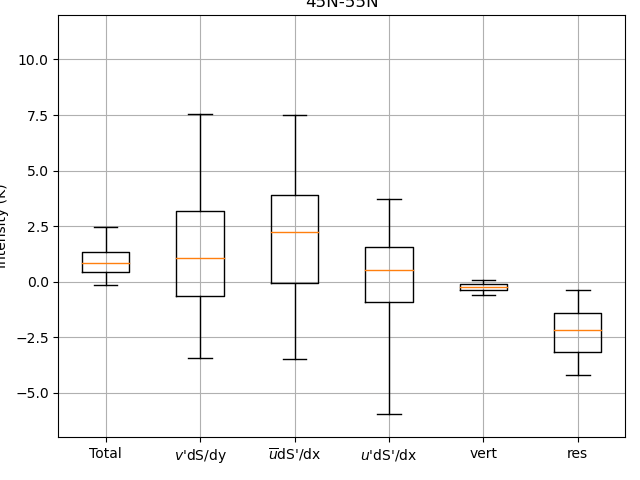

0.9619788512352808
1.4450182746008866
-5.023436773479202
2.0149876587627187
0.013707515035601293
-0.24907065267823048
-2.262663944485695


In [9]:
# fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
# fig.set_size_inches(8, 4)

plt.boxplot([np.array(int0)*DSE2T, np.array(int1)*DSE2T, np.array(int3)*DSE2T, np.array(int2)*DSE2T,
             np.array(int5)*DSE2T, np.array(int6)*DSE2T], showfliers=False, whis=(5,95))
# plt.ylim([-5e19,5e19])
# ax[1].boxplot([dur0, dur1, dur2, dur3])
plt.ylim([-7,12])

print(np.mean(int0)*5.324161022769655e-19)
print(np.mean(int1)*5.324161022769655e-19)
print(np.mean(int4)*5.324161022769655e-19)
print(np.mean(int3)*5.324161022769655e-19)
print(np.mean(int2)*5.324161022769655e-19)
print(np.mean(int5)*5.324161022769655e-19)
print(np.mean(int6)*5.324161022769655e-19)

plt.xticks([1, 2, 3, 4, 5, 6], ['Total', r'$v$'+'\''+'dS/dy', 
                                r'$\overline{u}$'+'dS\'/dx', r'$u$'+'\''+'dS\'/dx',  'vert', 'res'])
plt.grid()
plt.tight_layout()
plt.ylabel('Intensity (K)')
plt.title('45N-55N')

plt.savefig('/home/data/lab_abel/Paper1_plots/fig10_int10_poleward2.pdf', bbox_inches='tight')

## check cooling term

1.4328011202913962 4.4057560048439885


/tmp/ipykernel_968705/3222518156.py:97: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat0/c0, label='v', color='red', alpha=0.5)


<IPython.core.display.Javascript object>


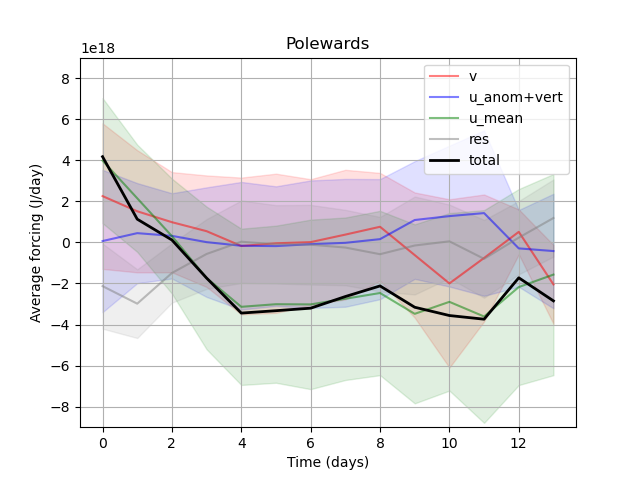

/tmp/ipykernel_968705/3222518156.py:98: RuntimeWarning: invalid value encountered in true_divide
  std=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
/tmp/ipykernel_968705/3222518156.py:99: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(range(len(heat0)), heat0/c0-std,heat0/c0+std, alpha=0.12,color='red')
/tmp/ipykernel_968705/3222518156.py:101: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat1/c1, label='u_anom+vert', color='blue', alpha=0.5)
/tmp/ipykernel_968705/3222518156.py:102: RuntimeWarning: invalid value encountered in true_divide
  std=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
/tmp/ipykernel_968705/3222518156.py:103: RuntimeWarning: invalid value encountered in true_divide
  plt.fill_between(range(len(heat1)), heat1/c1-std,heat1/c1+std, alpha=0.12,color='blue')
/tmp/ipykernel_968705/3222518156.py:105: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(heat2/c2, label='u_mean', color='green', alpha=0.5)
/tmp/ipyk

In [15]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv4', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv4', 'rb') as f:
    st=pickle.load(f)
    
with gzip.open('/home/scratch/Abel_data/heat_residuev4', 'rb') as f:
    res=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])

heat0=np.zeros(15)
heat1=np.zeros(15)
heat2=np.zeros(15)
res_arr=np.zeros(15)
res_arr2=np.zeros(15)
act=np.zeros(15)
act2=np.zeros(15)

heat20=np.zeros(15)
heat21=np.zeros(15)
heat22=np.zeros(15)

c0=np.zeros(15)
c1=np.zeros(15)
c2=np.zeros(15)
c3=np.zeros(15)
c4=np.zeros(15)

for i in range(len(Rey[0])):
    
#     if (dur_list[i]>=3  and dur_list[i]<=5):
    
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat0[j]+=t[j]
            heat20[j]+=t[j]*t[j]
            c0[j]+=1

        t=Rey[1][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat1[j]+=t[j]
            heat21[j]+=t[j]*t[j]
            c1[j]+=1

        t=Rey[2][i][:,:7].sum(axis=1)

        for j in range(len(t)):
            heat2[j]+=t[j]
            heat22[j]+=t[j]*t[j]
            c2[j]+=1
            
        t=res[i]

        for j in range(len(t)):
            res_arr[j]+=t[j]
            res_arr2[j]+=t[j]*t[j]
            c3[j]+=1
            
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)+convfv[i][:,:7].sum(axis=1)+res[i]

        for j in range(len(t)):
            act[j]+=t[j]
            act2[j]+=t[j]*t[j]
            c4[j]+=1


plt.plot(heat0/c0, label='v', color='red', alpha=0.5)
std=np.sqrt((heat20-(heat0*heat0)/c0)/(c0-1))
plt.fill_between(range(len(heat0)), heat0/c0-std,heat0/c0+std, alpha=0.12,color='red')

plt.plot(heat1/c1, label='u_anom+vert', color='blue', alpha=0.5)
std=np.sqrt((heat21-(heat1*heat1)/c1)/(c1-1))
plt.fill_between(range(len(heat1)), heat1/c1-std,heat1/c1+std, alpha=0.12,color='blue')

plt.plot(heat2/c2, label='u_mean', color='green', alpha=0.5)
std=np.sqrt((heat22-(heat2*heat2)/c2)/(c2-1))
plt.fill_between(range(len(heat2)), heat2/c2-std,heat2/c2+std, alpha=0.12,color='green')

plt.plot(res_arr/c3, label='res', color='grey', alpha=0.5)
std=np.sqrt((res_arr2-(res_arr*res_arr)/c3)/(c3-1))
plt.fill_between(range(len(res_arr)), res_arr/c3-std,res_arr/c3+std, alpha=0.12,color='grey')

plt.plot(heat0/c0+heat1/c1+heat2/c2+res_arr/c3, linewidth=2, color='black', label='total')
# plt.plot((act)/c, linewidth=2, color='black', label='total')

# plt.plot(act/c4, label='res', color='grey', alpha=0.5)
# std=np.sqrt((act2-(act*act)/c)/(c-1))
# plt.fill_between(range(len(act)), act/c-std,act/c+std, alpha=0.12,color='grey')

# print(np.mean(heat0), np.mean(heat1), np.mean(heat2))
# th=(heat0+heat1+heat2+res_arr)/c
# print(np.sum(th))

# plt.xlim([-0.1,10])

plt.legend()
plt.ylim(-9e18, 9e18)
plt.title('Polewards')
plt.ylabel('Average forcing (J/day)')
plt.xlabel('Time (days)')
plt.grid()
# plt.savefig('/home/data/lab_abel/Paper1_var1/fig10_dur_poleward2.png', bbox_inches='tight',dpi=300)

In [24]:
print(c2)
x=(heat2/c2)[:-4]
print(x[3:])

[1347. 1347. 1347. 1347. 1016.  470.  231.  116.   60.   38.   21.   10.
    5.    3.    0.]
[-1.73302076e+18 -3.13717873e+18 -3.01010917e+18 -3.01952668e+18
 -2.74477203e+18 -2.46442082e+18 -3.47957214e+18 -2.89519817e+18]


/tmp/ipykernel_968705/2160961258.py:2: RuntimeWarning: invalid value encountered in true_divide
  x=(heat2/c2)[:-4]


<IPython.core.display.Javascript object>


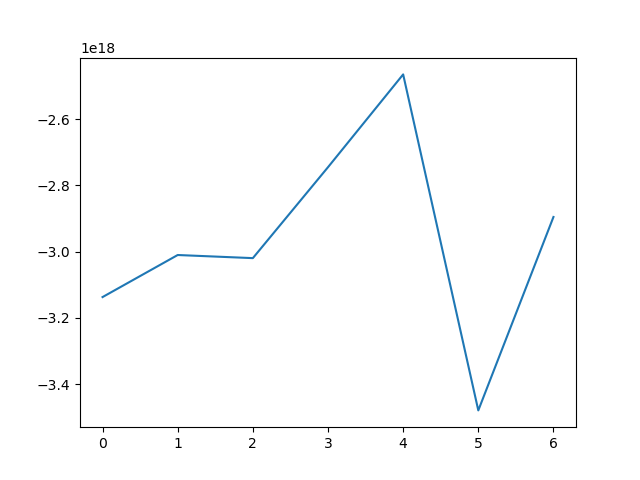

-2.9643968209777633e+18


In [27]:
plt.plot(x[4:])
print(np.mean(x[4:]))